## Python Glob

See https://docs.python.org/2/library/glob.html


In [1]:
!ls Data/Glob

f1.txt	f2.txt	f3.txt	f4.txt	f5.txt	f6.txt	f7.txt	f8.txt	f9.txt


In [2]:
import glob
glob.glob('Data/Glob/*.txt')

['Data/Glob/f7.txt',
 'Data/Glob/f9.txt',
 'Data/Glob/f8.txt',
 'Data/Glob/f1.txt',
 'Data/Glob/f6.txt',
 'Data/Glob/f5.txt',
 'Data/Glob/f2.txt',
 'Data/Glob/f3.txt',
 'Data/Glob/f4.txt']

In [3]:
file_list = glob.glob('Data/Glob/*.txt')
file_list

['Data/Glob/f7.txt',
 'Data/Glob/f9.txt',
 'Data/Glob/f8.txt',
 'Data/Glob/f1.txt',
 'Data/Glob/f6.txt',
 'Data/Glob/f5.txt',
 'Data/Glob/f2.txt',
 'Data/Glob/f3.txt',
 'Data/Glob/f4.txt']

In [5]:
# Sorting
file_list = sorted(file_list)
file_list

['Data/Glob/f1.txt',
 'Data/Glob/f2.txt',
 'Data/Glob/f3.txt',
 'Data/Glob/f4.txt',
 'Data/Glob/f5.txt',
 'Data/Glob/f6.txt',
 'Data/Glob/f7.txt',
 'Data/Glob/f8.txt',
 'Data/Glob/f9.txt']

In [8]:
# recursion
file_list = glob.glob('Data/**', recursive=True)
file_list

['Data/',
 'Data/Glob',
 'Data/Glob/f7.txt',
 'Data/Glob/f9.txt',
 'Data/Glob/f8.txt',
 'Data/Glob/f1.txt',
 'Data/Glob/f6.txt',
 'Data/Glob/f5.txt',
 'Data/Glob/f2.txt',
 'Data/Glob/f3.txt',
 'Data/Glob/f4.txt',
 'Data/static',
 'Data/static/jupyter_notebooks',
 'Data/static/jupyter_notebooks/jupyter_dashboard.png',
 'Data/static/jupyter_notebooks/command_mode.png',
 'Data/static/jupyter_notebooks/presentation_of_notebook.png',
 'Data/static/jupyter_notebooks/edit_mode.png',
 'Data/static/jupyter_notebooks/help_user_interface.gif',
 'Data/static/introduction',
 'Data/static/introduction/python_growing_curve.png',
 'Data/Fitting',
 'Data/Fitting/HB1_exp0762_scan0072.dat']

## For Loop

In [10]:
file_list = glob.glob('Data/Glob/*.txt')
for file in file_list:
    print(file)

Data/Glob/f7.txt
Data/Glob/f9.txt
Data/Glob/f8.txt
Data/Glob/f1.txt
Data/Glob/f6.txt
Data/Glob/f5.txt
Data/Glob/f2.txt
Data/Glob/f3.txt
Data/Glob/f4.txt


In [12]:
for i, file in enumerate(file_list):
    print(i, file)

0 Data/Glob/f7.txt
1 Data/Glob/f9.txt
2 Data/Glob/f8.txt
3 Data/Glob/f1.txt
4 Data/Glob/f6.txt
5 Data/Glob/f5.txt
6 Data/Glob/f2.txt
7 Data/Glob/f3.txt
8 Data/Glob/f4.txt


In [13]:
N = len(file_list)
for i in range(N):
    print(i, file_list[i])

0 Data/Glob/f7.txt
1 Data/Glob/f9.txt
2 Data/Glob/f8.txt
3 Data/Glob/f1.txt
4 Data/Glob/f6.txt
5 Data/Glob/f5.txt
6 Data/Glob/f2.txt
7 Data/Glob/f3.txt
8 Data/Glob/f4.txt


In [14]:
N = len(file_list)
for i, file in zip(range(N), file_list):
    print(i, file)

0 Data/Glob/f7.txt
1 Data/Glob/f9.txt
2 Data/Glob/f8.txt
3 Data/Glob/f1.txt
4 Data/Glob/f6.txt
5 Data/Glob/f5.txt
6 Data/Glob/f2.txt
7 Data/Glob/f3.txt
8 Data/Glob/f4.txt


### while loop

In [16]:
N = len(file_list)
i = 0
while i<N:
    print(i, file_list[i])
    i+=1

0 Data/Glob/f7.txt
1 Data/Glob/f9.txt
2 Data/Glob/f8.txt
3 Data/Glob/f1.txt
4 Data/Glob/f6.txt
5 Data/Glob/f5.txt
6 Data/Glob/f2.txt
7 Data/Glob/f3.txt
8 Data/Glob/f4.txt


### list comprehension

In [21]:
l = list(range(10))
print (l)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [22]:
[x**3 for x in l]

[0, 1, 8, 27, 64, 125, 216, 343, 512, 729]

In [23]:
[x**2 for x in l if x%2==0]

[0, 4, 16, 36, 64]

In [25]:
noprimes = [j for i in range(2, 8) for j in range(i*2, 50, i)]
primes = [x for x in range(2, 50) if x not in noprimes]
print (primes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]


In [27]:
words = 'The quick brown fox jumps over the lazy dog'.split()
[[w.upper(), w.lower(), len(w)] for w in words]

[['THE', 'the', 3],
 ['QUICK', 'quick', 5],
 ['BROWN', 'brown', 5],
 ['FOX', 'fox', 3],
 ['JUMPS', 'jumps', 5],
 ['OVER', 'over', 4],
 ['THE', 'the', 3],
 ['LAZY', 'lazy', 4],
 ['DOG', 'dog', 3]]

## Python path

In [7]:
import os.path

for file in file_list:
    print("Absolute Path: {}".format(os.path.abspath(file)))
    print("Base Name:     {}".format(os.path.basename(file)))
    

Absolute Path: /home/rhf/git/IPythonNotebookTutorial/Data/Glob/f1.txt
Base Name:     f1.txt
Absolute Path: /home/rhf/git/IPythonNotebookTutorial/Data/Glob/f2.txt
Base Name:     f2.txt
Absolute Path: /home/rhf/git/IPythonNotebookTutorial/Data/Glob/f3.txt
Base Name:     f3.txt
Absolute Path: /home/rhf/git/IPythonNotebookTutorial/Data/Glob/f4.txt
Base Name:     f4.txt
Absolute Path: /home/rhf/git/IPythonNotebookTutorial/Data/Glob/f5.txt
Base Name:     f5.txt
Absolute Path: /home/rhf/git/IPythonNotebookTutorial/Data/Glob/f6.txt
Base Name:     f6.txt
Absolute Path: /home/rhf/git/IPythonNotebookTutorial/Data/Glob/f7.txt
Base Name:     f7.txt
Absolute Path: /home/rhf/git/IPythonNotebookTutorial/Data/Glob/f8.txt
Base Name:     f8.txt
Absolute Path: /home/rhf/git/IPythonNotebookTutorial/Data/Glob/f9.txt
Base Name:     f9.txt


# Plotting

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

# All together

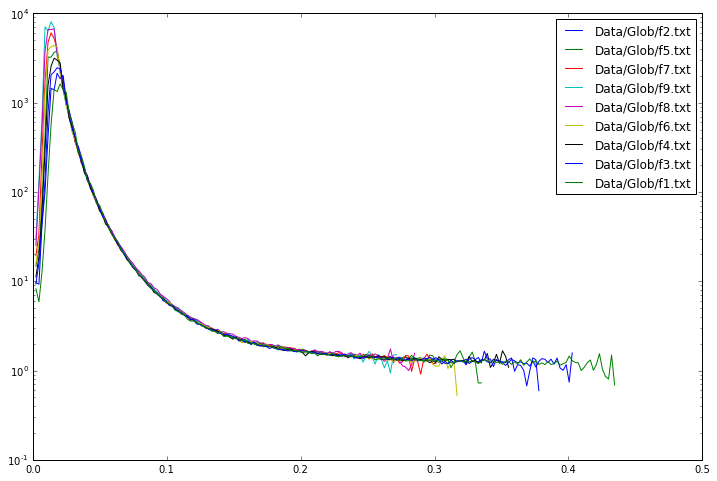

In [12]:
import numpy as np

file_list = glob.glob('Data/Glob/*.txt')
for file in file_list:
    data = np.genfromtxt(file, delimiter=",", skip_header=2, names='X,Y,E,DX')
    plt.semilogy(data['X'], data['Y'], label=file)
plt.legend()
    